# Scenario :

'Suppose you are working as compliance data science analyst in a firm. One of your task is to monitor internal communications in order to better understand employees’ moods and assess any potential risks. You can leverage sentiment analysis technology which has become a form of risk management and is emerging as a useful risk control tool for a variety of businesses to identify and address regulatory risk issues, compliance problems and potential fraud.'


# Dataset Description :

You have received a dataset which contains 3 columns:
- ID (Unique identifier for a sentence)
- label (1-Positive & 0-Negative)
- Text (Sentences)

# Evaluation Criteria :

1. This assignment has been divided in to 3 sections. Section 3 will be evaluated only if you score well in the section 1 and section 2. 
2. Write your codes only in the coding area. You can add more cells for your analysis.
3. You are not supposed to modify the original dataset.
4. You can leverage R or Python programming language for solving the assignment.

# Programming best practices :

1. You need to explicitly import all the packages/libaries at the starting of the notebook.
2. For any non trivial pieces of code, please write supporting comments.
3. All the cells should run with no error.

# Submission guidelines :

There are 2 files you need to zip and attach:
1. Final complied jupyter notebook.
2. Save the Jupyter notebook as .html and attach the same.

################################################# Assignment start ###########################################################

In [ ]:
# import the packages
import nltk
import scipy
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
nltk.download('punkt')
nltk.download('wordnet')
#import the nltk packages
from scipy import special
nltk.download('stopwords')
from sklearn import metrics 
warnings.simplefilter('ignore')
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score,KFold

In [ ]:
# Read the dataset

harassment=pd.read_csv("sentiment_data.csv")

In [149]:
harassment.head()

,Text,label,ID
0,i didnt feel humiliated,0,W0
1,i can go from feeling so hopeless to so damned...,0,W1
2,im grabbing a minute to post i feel greedy wrong,0,W2
3,i am ever feeling nostalgic about the fireplac...,1,W3
4,i am feeling grouchy,0,W4


### Section 1

#### Q1. How many Unique Ids are there in the dataset ?  ( *Look for exact answer)

In [150]:
#Ans: 
harassment['ID'].nunique()

15423

#### Q2. How many total missing values are there across all columns in the dataset?          ( *Look for exact answer)

In [151]:
#Ans: 
harassment.isna().sum().sum()

11

#### Q3. How many rows are there in the dataset after dropping the rows containing the missing values and removing duplicates (keep first occurence in case of duplicates)? ( *Look for exact answer)

In [6]:
#Ans:
harassment.dropna().drop_duplicates(keep='first').shape[0]

15417

#### Q4. What is the percentage of positive labels in the dataset ? ( *Look for exact answer)

In [152]:
#Ans: 
round(harassment[harassment['label']==1].shape[0]*100/harassment.shape[0],2)

43.21

In [153]:
# Create X and Y and print the shape

X=harassment.Text
y=harassment.label
print(X.shape)
print(y.shape)

(15428,)
(15428,)


#### Q5. How many unique tokens are present in the dataset including stop words ? ( *Look for code and analysis)

In [154]:
harrasment_copy =  harassment.copy()

In [155]:
#Ans:

harassment['Text']=harassment['Text'].apply(lambda x:word_tokenize(str(x)))
#lambda function to tokenise each row of the Text column using nltk library

In [156]:
all_words = [j for i in harassment['Text'] for j in i] #get all the words/tokens in a single list
len(set(all_words)) #number of unique tokens/words including stop words

14913

#### Q6. How many unique tokens are present in the dataset excluding english stop words ? ( *Look for code and analysis)

In [157]:
#Ans:
stop_words = set(stopwords.words('english'))  #using nltk library to get the list of english stop-words
def remove_stopwords(row):
    row = row.split()   #function to remove the stop words from Text column
    row_new = " ".join([i for i in row if i not in stop_words])
    return row_new

In [158]:
harrasment_copy.dropna(inplace=True) #drop all the null values before applying lambda operation 

In [159]:
harrasment_copy['Text']=harrasment_copy['Text'].apply(remove_stopwords) #apply lambda to remove stopwords

In [160]:
harrasment_copy['Text']=harrasment_copy['Text'].apply(lambda x:word_tokenize(str(x))) #tokensing the remaining Text column

In [161]:
all_words_without_stop_words = [j for i in harrasment_copy['Text'] for j in i] 
len(set(all_words_without_stop_words)) #number of unique tokens/words excluding stop words

14766

### Section 2

#### Q7. What is Zipf distribution and Plot Zipf distribution for 500 tokens in decreasing order including stop words ? ( *Look for descriptive answer, code and plot)

The Zipf distribution (also known as the zeta distribution) is a continuous probability distribution that satisfies Zipf’s law: the frequency of an item is inversely proportional to its rank in a frequency table

In [18]:
#Ans:
frequency_dict = {}
for word in all_words[0:500]:
    frequency_dict[word] = all_words.count(word)
frequency_dict_sorted = {k:v for k,v in sorted(frequency_dict.items(), key=lambda x:x[1],reverse=True)}
frequency_dict_sorted  # top 500 elements with their freuency in descending order 

{'i': 24920,
 'feel': 10822,
 'and': 9226,
 'to': 8702,
 'the': 8027,
 'a': 5942,
 'feeling': 4900,
 'that': 4894,
 'of': 4795,
 'my': 4116,
 'in': 3301,
 'it': 2991,
 'like': 2817,
 'so': 2433,
 'for': 2356,
 'im': 2338,
 'me': 2221,
 'but': 2164,
 'have': 2140,
 'was': 2113,
 'is': 2105,
 'am': 2014,
 'this': 2009,
 'with': 1919,
 'be': 1719,
 'about': 1717,
 'as': 1509,
 'on': 1499,
 'you': 1425,
 'just': 1334,
 'at': 1297,
 'or': 1212,
 'all': 1135,
 'because': 1118,
 'more': 1098,
 'do': 1030,
 'can': 1014,
 'really': 901,
 'up': 892,
 't': 872,
 'been': 827,
 'know': 825,
 'out': 774,
 'time': 758,
 'get': 722,
 'had': 696,
 'little': 692,
 'now': 686,
 'will': 677,
 'from': 669,
 'being': 665,
 'would': 621,
 'her': 614,
 'some': 596,
 'think': 573,
 'ive': 567,
 'still': 555,
 'an': 550,
 'who': 545,
 'life': 529,
 'make': 509,
 'something': 497,
 'much': 471,
 'dont': 470,
 'things': 460,
 's': 453,
 'no': 431,
 'too': 430,
 'm': 420,
 'day': 416,
 'she': 401,
 'has': 393,
 'g

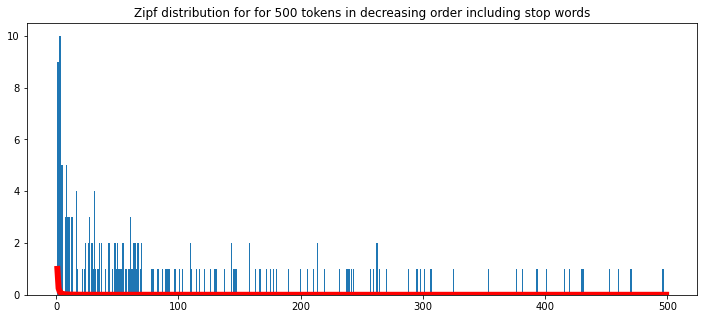

In [172]:
#define zipf distribution parameter
a = 2. 
#get list of values from frequency and convert to numpy array
s = list(frequency_dict_sorted.values())
s = np.array(s)
# Display the histogram of the samples, along with the probability density function:
plt.figure(figsize=(12,5))
count, bins, ignored = plt.hist(s[s<500], 500)
x = np.arange(1., 500.)
y = x**(-a) / special.zetac(a)
plt.plot(x, y/max(y), linewidth=6,color='r')
plt.title('Zipf distribution for for 500 tokens in decreasing order including stop words')
plt.show()


#### Q8. Plot frequency disribution of top 50 tokens in negative data including stop words

In [20]:
#Ans:
df_negative = harassment[harassment['label']==0] #take only negative data set

all_words_neg = [j for i in df_negative['Text'] for j in i] #list of all words in negative data set

frequency_dict_neg = {}
for word in all_words_neg:
    frequency_dict_neg[word] = all_words_neg.count(word)

# sorted frequency distribution dictionary for negative data set
frequency_dict_sorted_neg = {k:v for k,v in sorted(frequency_dict_neg.items(), key=lambda x:x[1],reverse=True)}


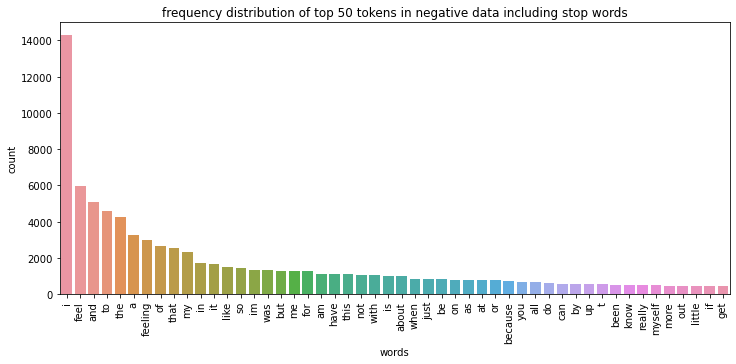

In [24]:
plt.figure(figsize=(12,5))

frequency_dict_sorted_df_neg = pd.DataFrame(frequency_dict_sorted_neg.items(),columns=['words','count']) #converting dict to dataframe
top_50_neg = list(frequency_dict_sorted_neg.keys())[0:50] #taking top50 words/tokens
top_50_neg_df = frequency_dict_sorted_df_neg[frequency_dict_sorted_df_neg['words'].isin(top_50_neg)] 

#plot the top 50 words in negative data set including stop_words
g = sns.barplot(top_50_neg_df['words'],top_50_neg_df['count'])
g.set_xticklabels(labels=top_50_neg_df['words'],rotation=90)
plt.title('frequency distribution of top 50 tokens in negative data including stop words')
plt.show()

#### Q9. Plot frequency disribution of top 50 tokens in positive data including stop words

In [ ]:
#Ans:
df_positive = harassment[harassment['label']==1] #taking only positive data set

all_words_pos = [j for i in df_positive['Text'] for j in i]

frequency_dict_pos = {}
for word in all_words_pos:
    frequency_dict_pos[word] = all_words_pos.count(word)
frequency_dict_sorted_pos = {k:v for k,v in sorted(frequency_dict_pos.items(), key=lambda x:x[1],reverse=True)}
frequency_dict_sorted_pos

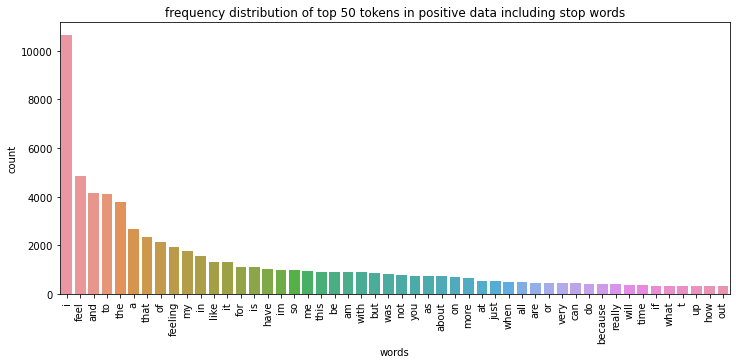

In [29]:
plt.figure(figsize=(12,5))
frequency_dict_sorted_df_pos = pd.DataFrame(frequency_dict_sorted_pos.items(),columns=['words','count'])

top_50_pos = list(frequency_dict_sorted_pos.keys())[0:50]
top_50_pos_df = frequency_dict_sorted_df_pos[frequency_dict_sorted_df_pos['words'].isin(top_50_pos)]

g = sns.barplot(top_50_pos_df['words'],top_50_pos_df['count'])
g.set_xticklabels(labels=top_50_pos_df['words'],rotation=90)
plt.title('frequency distribution of top 50 tokens in positive data including stop words')
plt.show()

### Section 3

In [ ]:
# Use the following terminology (formulae) for this section:

# 'pos frequency' means how many times a token has occurred in positive labeled data
# 'neg frequency' means how many times a token has occurred in negative labeled data
# 'pos rate' = (pos frequency)/ (pos frequency + neg frequency); Similarly, we can compute 'neg rate'
# 'Total pos frequency' = sum of 'pos frequency' of all tokens; Similaryl, we can compute 'Total neg frequency'
# 'pos_freq_pct' = (pos frequency)/ (Total pos frequency); Similarly, we can compute 'neg_freq_pct'


In [53]:
#Ans:
freq_table = pd.DataFrame()

freq_table = pd.merge(frequency_dict_sorted_df_pos,frequency_dict_sorted_df_neg,how='outer',on='words').rename(columns={'count_x':'pos_frequency','count_y':'neg_frequency'}).fillna(0)

freq_table['pos_rate'] =  round(freq_table['pos_frequency']/(freq_table['pos_frequency']+freq_table['neg_frequency']),2)
freq_table['neg_rate'] =  round(freq_table['neg_frequency']/(freq_table['pos_frequency']+freq_table['neg_frequency']),2)


print('Total positive frequency:',sum(freq_table['pos_frequency']))
print('Total negative frequency:',sum(freq_table['neg_frequency']))

freq_table['pos_freq_pct'] =  round(freq_table['pos_frequency']/(sum(freq_table['pos_frequency'])),2)
freq_table['neg_freq_pct'] =  round(freq_table['neg_frequency']/(sum(freq_table['neg_frequency'])),2)

In [86]:
freq_table['harmonic_pos_freq_pct'] =  round((2*freq_table['pos_frequency']*freq_table['pos_rate'])/(freq_table['pos_frequency']+freq_table['pos_rate']),2)
freq_table['harmonic_neg_freq_pct'] =  round((2*freq_table['neg_frequency']*freq_table['neg_rate'])/(freq_table['neg_frequency']+freq_table['neg_rate']),2)

In [96]:
freq_table['norm_cdf_pos_rate'] = scipy.stats.norm.cdf(freq_table['pos_rate'])
freq_table['norm_cdf_neg_rate'] = scipy.stats.norm.cdf(freq_table['neg_rate'])
freq_table['norm_cdf_pos_freq_pct'] = scipy.stats.norm.cdf(freq_table['pos_freq_pct'])
freq_table['norm_cdf_neg_freq_pct'] = scipy.stats.norm.cdf(freq_table['neg_freq_pct'])


In [98]:
freq_table['harmonic_pos_cdf'] =  round((2*freq_table['norm_cdf_pos_rate']*freq_table['norm_cdf_pos_freq_pct'])/(freq_table['norm_cdf_pos_freq_pct']+freq_table['norm_cdf_pos_rate']),2)
freq_table['harmonic_neg_cdf'] =  round((2*freq_table['norm_cdf_neg_rate']*freq_table['norm_cdf_neg_freq_pct'])/(freq_table['norm_cdf_neg_rate']+freq_table['norm_cdf_neg_freq_pct']),2)

### Feature Engineering --
Above all the formulaes were used and different columns were created for analysis:
1. 'pos frequency' means how many times a token has occurred in positive labeled data
2. 'neg frequency' means how many times a token has occurred in negative labeled data
3. 'pos rate' = (pos frequency)/ (pos frequency + neg frequency); Similarly, we can compute 'neg rate'
4. 'pos_freq_pct' = (pos frequency)/ (Total pos frequency); Similarly, we can compute 'neg_freq_pct'
5. harmonic_pos_freq_pct : harmonic mean between pos frequency and pos_freq_perc for each token
6. harmonic_neg_freq_pct  :  harmonic mean between neg frequency and neg_freq_perc for each token	
7. norm_cdf_pos_rate	: normal distibution cdf value of pos rate (mu=0.sig=1)
8. norm_cdf_neg_rate	: normal distibution cdf value of neg rate (mu=0.sig=1)
9. norm_cdf_pos_freq_pct	: normal distibution cdf value of pos freq pct (mu=0.sig=1)
10. norm_cdf_neg_freq_pct	: normal distibution cdf value of neg freq pct (mu=0.sig=1)
11. harmonic_pos_cdf	: harmonic mean between norm_cdf_pos_rate and norm_cdf_pos_freq_pct for each token	
12. harmonic_neg_cdf :  harmonic mean between norm_cdf_neg_rate and norm_cdf_neg_freq_pct for each token

In [173]:
freq_table.head()  # data preview after creating columns 

,words,pos_frequency,neg_frequency,pos_rate,neg_rate,pos_freq_pct,neg_freq_pct,harmonic_pos_freq_pct,harmonic_neg_freq_pct,norm_cdf_pos_rate,norm_cdf_neg_rate,norm_cdf_pos_freq_pct,norm_cdf_neg_freq_pct,harmonic_pos_cdf,harmonic_neg_cdf
0,i,10635.0,14285.0,0.43,0.57,0.08,0.09,0.86,1.14,0.666402,0.715661,0.531881,0.535856,0.59,0.61
1,feel,4854.0,5968.0,0.45,0.55,0.04,0.04,0.90,1.10,0.673645,0.708840,0.515953,0.515953,0.58,0.60
2,and,4171.0,5055.0,0.45,0.55,0.03,0.03,0.90,1.10,0.673645,0.708840,0.511966,0.511966,0.58,0.59
3,to,4092.0,4610.0,0.47,0.53,0.03,0.03,0.94,1.06,0.680822,0.701944,0.511966,0.511966,0.58,0.59
4,the,3771.0,4256.0,0.47,0.53,0.03,0.03,0.94,1.06,0.680822,0.701944,0.511966,0.511966,0.58,0.59


#### Q10. Plot the relationship between (pos frequency) & (neg frequency) for each token


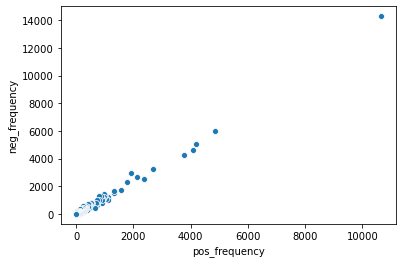

In [174]:
sns.scatterplot(freq_table['pos_frequency'],freq_table['neg_frequency'])
plt.show()

### We can observe from the above plot that :
1. if the frequency of the word/token is less in negative data , then it also low in positive data.
2. if the frequency of the word/token is high in negative data , then it is also high in positive data.
3. We can not infer from here the magnitude of correlatoion but the direction that they are positively correlated.

#### Q11. Plot the relationship between (harmonic mean between pos rate and pos_freq_pct) & (harmonic mean between neg rate and neg_freq_pct) for each token

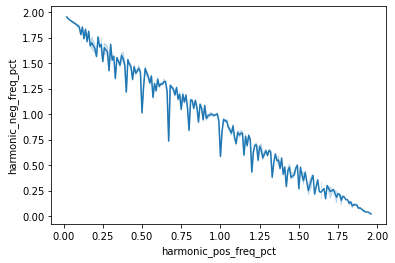

In [175]:
sns.lineplot(freq_table['harmonic_pos_freq_pct'],freq_table['harmonic_neg_freq_pct'])
plt.show()

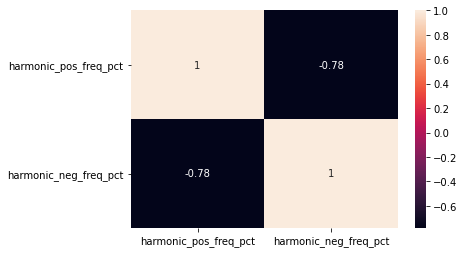

In [179]:
sns.heatmap(freq_table[['harmonic_pos_freq_pct','harmonic_neg_freq_pct']].corr(),annot=True)
plt.show()

### We can observe from the above plot that :

1. Since we are dealing with ratios , it makes sense to use harmonic mean to calculte the mean as the scales are different and it should take care of the denominator .

2. harmonic mean value of frequency of words/tokens in  positive data is correralted negatively with the mean value of frequency of words present in negative data .


#### Q12. Plot the relationship between (harmonic mean between normal distribution cdf of pos rate and normal distribution cdf of pos_freq_pct) & (harmonic mean between normal distribution cdf of neg rate and normal distribution cdf of neg_freq_pct) for each token

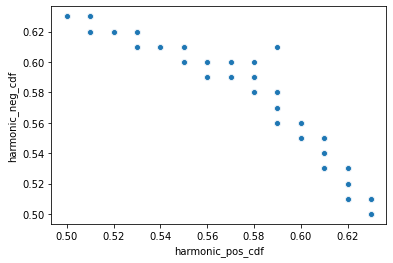

In [100]:
sns.scatterplot(freq_table['harmonic_pos_cdf'],freq_table['harmonic_neg_cdf'])
plt.show()

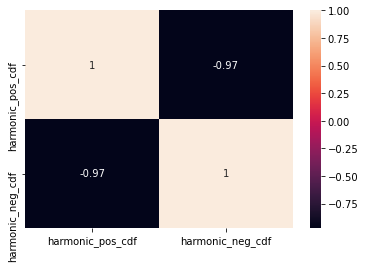

In [180]:
sns.heatmap(freq_table[['harmonic_pos_cdf','harmonic_neg_cdf']].corr(),annot=True)
plt.show()

### We can observe from the above plot that :
when normally distibuted the words are pretty much different in both the negative data set and frequency of words are negatively correlated in both the labels .Also , we can see that in the middle there is a slight bump which tells us that few highly frequent words like "i","feel" , 'and' etc are present in almost same amount in both the labels.



#### Q13. Which plot out of the above 3 better explains the relationships between words in neg and pos rows. Why ?


As far as all the three graphs are concerned ,third graph explains the relationship between words in neg and pos rows the most.
Reasons are listed below :
1. when normally distibuted the words are pretty much different in both the negative data set and frequency of words are negatively correlated in both the labels .Also , we can see that in the middle there is a slight bump which tells us that few highly frequent words like "i","feel" , 'and' etc are present in almost same amount in both the labels.
2. It takes care of the highly frequent words other than stop words also and tells us the correct scenario that there are different kind of words used in positive and negative data

#### Q14. Suppose we want to build a machine learning model to predict whether a given sentence has positive or negative sentiment. Explain the entire pipeline highlighting the various steps and algorithms for the same.

In [181]:
df=pd.read_csv("sentiment_data.csv") # read the data fresh for ML algos

In [183]:
df.head() #preview of the data

,Text,label,ID
0,i didnt feel humiliated,0,W0
1,i can go from feeling so hopeless to so damned...,0,W1
2,im grabbing a minute to post i feel greedy wrong,0,W2
3,i am ever feeling nostalgic about the fireplac...,1,W3
4,i am feeling grouchy,0,W4


### Data preprocessing

In [184]:
df = df.drop('ID',1).dropna().drop_duplicates(keep='first')  #drop the unused column,NAN and missing values,duplicates

In [112]:
df_process = df.copy(deep=True) #create a duplicate copy of the data set.

In [ ]:
# Since the data is balanced there is no need for sampling.

In [113]:

#lowering the case of all the text
df_process['Text'] =df_process['Text'].apply(lambda x: str(x).lower()) 
df_process.head()

,Text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,0
3,i am ever feeling nostalgic about the fireplac...,1
4,i am feeling grouchy,0


In [116]:
# Remove punctuations
df_process['Text']=df_process['Text'].apply(lambda x: x.translate({ord(c):'' for c in "[!”#$%&’()*+,-./:;<=>?@[\]^_`{|}~]"}))
df_process.head()

,Text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,0
3,i am ever feeling nostalgic about the fireplac...,1
4,i am feeling grouchy,0


In [117]:
df_process['Text']=df_process['Text'].apply(lambda x: x.strip()) #strip the spaces

In [118]:
#Remove stop words
stop_words = set(stopwords.words('english'))
def remove_stopwords(row):
    row = row.split()
    row_new = " ".join([i for i in row if i not in stop_words])
    return row_new
df_process['Text']=df_process['Text'].apply(remove_stopwords)


In [119]:
df_process.head()

,Text,label
0,didnt feel humiliated,0
1,go feeling hopeless damned hopeful around some...,0
2,im grabbing minute post feel greedy wrong,0
3,ever feeling nostalgic fireplace know still pr...,1
4,feeling grouchy,0


In [185]:
#tokenise the data for lemmatisation
df_process['Text']=df_process['Text'].apply(lambda x:word_tokenize(x))
df_process.head()

,Text,label
0,"[didnt, feel, humiliated]",0
1,"[go, feeling, hopeless, damned, hopeful, aroun...",0
2,"[im, grabbing, minute, post, feel, greedy, wrong]",0
3,"[ever, feeling, nostalgic, fireplace, know, st...",1
4,"[feeling, grouchy]",0


In [186]:
#lemaatize the tokens to the root
lemmatizer = WordNetLemmatizer()
def lemmatize_root(row):
    new = []
    new = [lemmatizer.lemmatize(x) for x in row ] 
    return ' '.join(new)
df_process['Text']=df_process['Text'].apply(lemmatize_root)

In [187]:
df_process.head()

,Text,label
0,didnt feel humiliated,0
1,go feeling hopeless damned hopeful around some...,0
2,im grabbing minute post feel greedy wrong,0
3,ever feeling nostalgic fireplace know still pr...,1
4,feeling grouchy,0


### Splitting the data

In [188]:
X_train, X_test, y_train, y_test = train_test_split(df_process['Text'], df_process['label'], test_size=0.3, random_state=0)

In [136]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(10777,) (4619,) (10777,) (4619,)


### BOW using TF-IDF , converting words to numeric values

In [138]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()  # TF-IDF vectorise for vectorisation
vectorizer.fit(X_train)


TfidfVectorizer()

In [139]:
train_data = vectorizer.transform(X_train)
test_data = vectorizer.transform(X_test)

### Baseline Model : Logistic Regression .
Since the 2-class label is there and logistic regression uses CART approach , it is suitable fit for binary classification of our case.

In [140]:
classifier = LogisticRegression()
classifier.fit(train_data, y_train)

LogisticRegression()

### Evaluation of Model

In [142]:
accuracy = classifier.score(test_data, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.9528036371508984


In [190]:
X_pred = classifier.predict(train_data)
y_pred = classifier.predict(test_data)


In [194]:
print(classification_report(y_train, X_pred))
# Confusion matrix F1 score , precision and Recall 

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      6138
           1       0.99      0.97      0.98      4639

    accuracy                           0.98     10777
   macro avg       0.98      0.98      0.98     10777
weighted avg       0.98      0.98      0.98     10777



### We can see that model is able to identify and detect correct labels with great precision and recall.

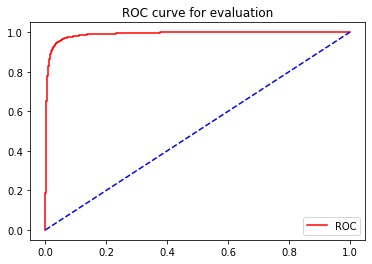

In [205]:

classifier.fit(train_data, y_train)

#AUC Curve
y_pred_proba = classifier.predict_proba(test_data)[::,1]
fpr, tpr, threshold = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,color='r',label="ROC")
plt.plot([0,1],[0,1],color='b',linestyle='--')

plt.legend(loc=4)
plt.title('ROC curve for evaluation')
plt.show()

### ROC curve show that AUC value is high which tells us model is able to distinguish between negative and positive data set properly.

### Testing with Raw data

In [146]:
new_reviews = ['useless fellow', 'good effort', 'happy service','a very bad service']
X_new = vectorizer.transform(new_reviews)
classifier.predict(X_new)

array([0, 1, 1, 0], dtype=int64)

### Above experiment shows us that model is able to work properly on unseen data  too.

### Extra models 


In [210]:
def get_models_comparison(X= train_data,y=y_train,test_data=test_data):
                   
    models = []
    random_st=0
    models.append(('Random Forest Classifier',RandomForestClassifier()))
    models.append(('K-neighbors:', KNeighborsClassifier()))
    models.append(('Decision Tree:', DecisionTreeClassifier()))
    results = []
    names = []
    x=0
    c=0
    for name, model in models:
        warnings.simplefilter("ignore")
        c=0
        model.fit(X, y)
        names.append(name)
        X_pred = model.predict(X)
        y_pred = model.predict(test_data)
        print(name)
        print(classification_report(y, X_pred))
        print('------------')


In [211]:
get_models_comparison()

Random Forest Classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6138
           1       1.00      1.00      1.00      4639

    accuracy                           1.00     10777
   macro avg       1.00      1.00      1.00     10777
weighted avg       1.00      1.00      1.00     10777

------------
K-neighbors:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      6138
           1       0.94      0.91      0.93      4639

    accuracy                           0.94     10777
   macro avg       0.94      0.94      0.94     10777
weighted avg       0.94      0.94      0.94     10777

------------
Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6138
           1       1.00      1.00      1.00      4639

    accuracy                           1.00     10777
   macro avg       1.00      1.00      1.00     1

#_______________________________________END_______________________________________________